In [3]:
import pandas as pd
data_train = pd.read_csv('datingData_training.txt',sep="\t+",header=None)
data_train.columns=['frequent flyer miles','percentage of time','liters of ice cream','Class']
data_test=pd.read_csv('datingData_test.txt',sep="\t+",header=None)
data_test.columns=['frequent flyer miles','percentage of time','liters of ice cream','Class']
data_train,data_test

C:\Users\Anannya Saha\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


(     frequent flyer miles  percentage of time  liters of ice cream       Class
 0                   40920            8.326976             0.953952  largeDoses
 1                   14488            7.153469             1.673904  smallDoses
 2                   26052            1.441871             0.805124   didntLike
 3                   75136           13.147394             0.428964   didntLike
 4                   38344            1.669788             0.134296   didntLike
 ..                    ...                 ...                  ...         ...
 595                 28631            7.661515             0.055981  largeDoses
 596                 71036            6.353608             1.645301   didntLike
 597                 71142           10.442780             0.335870   didntLike
 598                 37653            3.834509             1.346121   didntLike
 599                 76839           10.998587             0.584555   didntLike
 
 [600 rows x 4 columns],
      frequen

In [4]:
data_train_Y=data_train['Class']
data_train_X=data_train.drop('Class',axis=1)
data_test_Y=data_test['Class']
data_test_X=data_test.drop('Class',axis=1)

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.metrics import f1_score
import time
import numpy as np

In [5]:
data=pd.concat([data_train,data_test],axis=0)
data
X=data.drop('Class',axis=1)
Y=data['Class']


In [6]:
from sklearn.model_selection import cross_val_score
clf=tree.DecisionTreeClassifier(max_depth=3)
cross_fold_accuracy=cross_val_score(clf,X,Y,cv=10,scoring='accuracy')
cross_fold_precision=cross_val_score(clf,X,Y,cv=10,scoring='precision_weighted')
cross_fold_f1=cross_val_score(clf,X,Y,cv=10,scoring='f1_weighted')
report_cf={}
report_cf= pd.DataFrame(report_cf)
report_cf=report_cf.assign(Accuracy=cross_fold_accuracy)
report_cf=report_cf.assign(Precision=cross_fold_precision)
report_cf=report_cf.assign(F1=cross_fold_f1)
report_cf=report_cf.assign(id_=[1,2,3,4,5,6,7,8,9,10])
report_cf

,Accuracy,Precision,F1,id_
0,0.93,0.930000,0.930000,1
1,0.90,0.901958,0.898250,2
2,0.93,0.935766,0.928721,3
3,0.96,0.964211,0.959821,4
4,0.96,0.962727,0.959418,5
5,0.98,0.980286,0.979996,6
6,0.96,0.959973,0.959842,7
7,0.97,0.971462,0.969683,8
8,0.96,0.960414,0.959633,9
9,0.94,0.945245,0.938272,10


<AxesSubplot:xlabel='id_'>

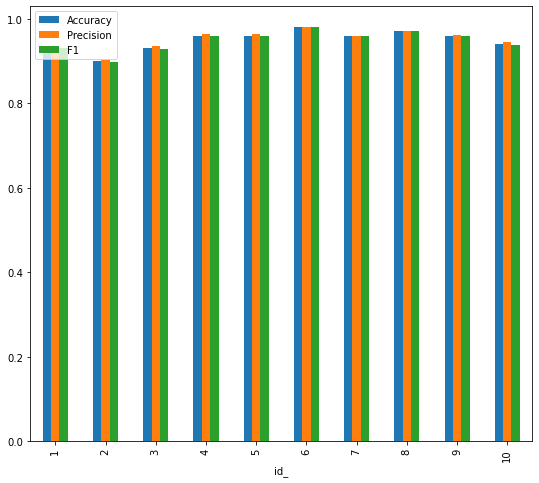

In [13]:
report_cf.plot(x='id_', y=["Accuracy", "Precision","F1"], kind="bar", figsize=(9, 8))

Text(0, 0.5, 'F_measure')

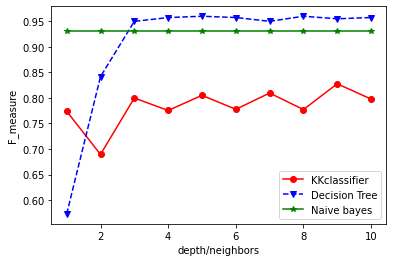

In [21]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
trials_1=[1,2,3,4,5,6,7,8,9,10]

f_measure_kk=np.zeros(len(trials_1))
f_measure_dt=np.zeros(len(trials_1))
index=0
for i in trials_1:
    clf = KNeighborsClassifier(i, p=2)
    clf.fit(data_train_X, data_train_Y)
    Y_predTest = clf.predict(data_test_X)
    f_measure_kk[index]=f1_score(data_test_Y, Y_predTest,average='weighted')
    index=index+1
index=0
for i in trials_1:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(data_train_X, data_train_Y)
    Y_predTest=clf.predict(data_test_X)
    f_measure_dt[index]=f1_score(data_test_Y, Y_predTest,average='weighted')
    index=index+1
naive_bayes = GaussianNB()
naive_bayes.fit(data_train_X, data_train_Y)
Y_predTest=naive_bayes.predict(data_test_X)
naive_f1=metrics.f1_score(Y_predTest , data_test_Y,average='weighted')
naive_f1_arr=np.full(10,naive_f1)
plt.plot(trials_1,f_measure_kk,'ro-',trials_1,f_measure_dt,'bv--',trials_1,naive_f1_arr,'g*-')
plt.legend(['KKclassifier','Decision Tree','Naive bayes'])
plt.xlabel('depth/neighbors')
plt.ylabel('F_measure')